In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pygal
from pygal.style import Style
import yfinance as yf

In [3]:
bcy = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2019/JAN/cm16JAN2019bhav.csv.zip',index_col=0)
bcm = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2019/DEC/cm16DEC2019bhav.csv.zip',index_col=0)
bcq = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2019/SEP/cm16SEP2019bhav.csv.zip',index_col=0)
m = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2020/JAN/cm13JAN2020bhav.csv.zip',index_col=0)
tu = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2020/JAN/cm14JAN2020bhav.csv.zip',index_col=0)
w = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2020/JAN/cm15JAN2020bhav.csv.zip',index_col=0)
th = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2020/JAN/cm16JAN2020bhav.csv.zip',index_col=0)
f = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2020/JAN/cm17JAN2020bhav.csv.zip',index_col=0)

<BarContainer object of 8 artists>

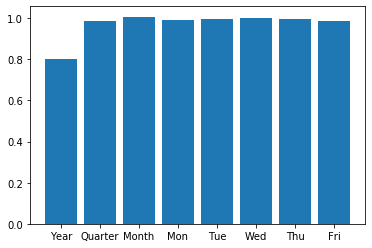

In [43]:
s = 'ASTRAL'
plt.bar(x = ['Year','Quarter','Month','Mon','Tue','Wed','Thu','Fri'],
        height=([bcy.loc[s,'CLOSE']*0.8,bcq.loc[s,'CLOSE'],bcm.loc[s,'CLOSE'],
                  m.loc[s,'CLOSE'],tu.loc[s,'CLOSE'],w.loc[s,'CLOSE'],
                  th.loc[s,'CLOSE'],f.loc[s,'CLOSE']]/bcy.loc[s,'CLOSE']))

In [42]:
bcq.loc['ASTRAL']

SERIES                   EQ
OPEN                   1195
HIGH                 1254.1
LOW                  1101.1
CLOSE               1119.05
LAST                   1119
PREVCLOSE           1346.75
TOTTRDQTY            167669
TOTTRDVAL       1.93035e+08
TIMESTAMP       16-SEP-2019
TOTALTRADES           15990
ISIN           INE006I01046
Unnamed: 13             NaN
Name: ASTRAL, dtype: object

In [11]:
y = [bcy.loc['VIPIND','CLOSE'],bcq.loc['VIPIND','CLOSE'],bcm.loc['VIPIND','CLOSE']]
y
     

[512.05, 417.3, 427.55]

In [2]:
bc = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2020/JAN/cm21JAN2020bhav.csv.zip',index_col=0)
# Doji
doji = bc[(bc['LOW']<=0.9*bc['HIGH']) & (bc['OPEN']>0.98*bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
#  Green Hammer
ghammer = bc[(bc['LOW']<=0.98*bc['OPEN']) & (bc['TOTTRDVAL']>10E7) & (bc['CLOSE']>bc['OPEN']) & (bc['OPEN']>0.98*bc['CLOSE'])].index.to_list()
#  Red Hammer
rhammer = bc[(bc['LOW']<=0.97*bc['CLOSE']) & (bc['TOTTRDVAL']>10E7) & (bc['CLOSE']<0.98*bc['OPEN'])].index.to_list()
# Green long body
greens = bc[(bc['OPEN']<=0.95*bc['CLOSE']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
# Red long body
reds = bc[(bc['CLOSE']<=0.95*bc['OPEN']) & (bc['OPEN']>bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
#  Gainers and losers
gainers = (bc[bc['TOTTRDVAL']>10E7].CLOSE/bc[bc['TOTTRDVAL']>10E7].PREVCLOSE).sort_values(ascending=False).head(10).index.to_list()
losers = (bc[bc['TOTTRDVAL']>10E7].CLOSE/bc[bc['TOTTRDVAL']>10E7].PREVCLOSE).sort_values(ascending=False).tail(10).index.to_list()
#  Geen long bottom wick
greens= bc[(bc['LOW']<=0.98*bc['OPEN']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
# 10%  Gain over prev day with green body
megagainers=bc[(bc['CLOSE']>1.05*bc['PREVCLOSE']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
# max diff between high and low
volatile=bc[(bc['HIGH']>1.15*bc['LOW']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
types = [greens,reds,ghammer,rhammer,gainers,losers,doji,megagainers]
types_name = ['Green body','Red body','Green hammer','Red hammer','Gainers','Losers', 'Doji','Mega Gainers more than 10 pct']
study = pd.DataFrame({'greenBody': pd.Series(greens), 'redBody': pd.Series(reds),'gHammer': pd.Series(ghammer),'rHammer': pd.Series(rhammer),
                      'gainers': pd.Series(gainers),'losers': pd.Series(losers),'doji': pd.Series(doji),'megaGainers': pd.Series(megagainers),'volatile': pd.Series(volatile)})
df = study.fillna("")
df.style.set_properties(**{'background-color': 'black','color': 'lawngreen',}).hide_index()

greenBody,redBody,gHammer,rHammer,gainers,losers,doji,megaGainers,volatile
ADANIGREEN,DCBBANK,ADANIGREEN,,IDEA,NMDC,,AIAENG,ATULAUTO
APLLTD,GRANULES,APLLTD,,SPENCERS,BHEL,,ATULAUTO,CANFINHOME
ASHOKA,PRESTIGE,ASHOKA,,CANFINHOME,RELINFRA,,CANFINHOME,NEWGEN
AVANTIFEED,,CHAMBLFERT,,NEWGEN,STRTECH,,DISHTV,SPENCERS
CHAMBLFERT,,ICICIPRULI,,ATULAUTO,POLYCAB,,GMMPFAUDLR,
ICICIPRULI,,IRB,,HAL,NHPC,,HAL,
IRB,,THOMASCOOK,,INFRATEL,GRANULES,,IDEA,
NEWGEN,,,,INDOCO,PFC,,IIFL,
THOMASCOOK,,,,AIAENG,DCBBANK,,INDOCO,
V2RETAIL,,,,JAYBARMARU,PRESTIGE,,INFRATEL,


In [6]:
bc = pd.read_csv('https://www1.nseindia.com/content/historical/EQUITIES/2020/JAN/cm16JAN2020bhav.csv.zip',index_col=0)
# Doji
doji = bc[(bc['LOW']<=0.9*bc['HIGH']) & (bc['OPEN']>0.98*bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
#  Green Hammer
ghammer = bc[(bc['LOW']<=0.98*bc['OPEN']) & (bc['TOTTRDVAL']>10E7) & (bc['CLOSE']>bc['OPEN']) & (bc['OPEN']>0.98*bc['CLOSE'])].index.to_list()
#  Red Hammer
rhammer = bc[(bc['LOW']<=0.97*bc['CLOSE']) & (bc['TOTTRDVAL']>10E7) & (bc['CLOSE']<0.98*bc['OPEN'])].index.to_list()
# Green long body
greens = bc[(bc['OPEN']<=0.95*bc['CLOSE']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
# Red long body
reds = bc[(bc['CLOSE']<=0.95*bc['OPEN']) & (bc['OPEN']>bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
#  Gainers and losers
gainers = (bc[bc['TOTTRDVAL']>10E7].CLOSE/bc[bc['TOTTRDVAL']>10E7].PREVCLOSE).sort_values(ascending=False).head(10).index.to_list()
losers = (bc[bc['TOTTRDVAL']>10E7].CLOSE/bc[bc['TOTTRDVAL']>10E7].PREVCLOSE).sort_values(ascending=False).tail(10).index.to_list()
#  Geen long bottom wick
greens= bc[(bc['LOW']<=0.98*bc['OPEN']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
# 10%  Gain over prev day with green body
megagainers=bc[(bc['CLOSE']>1.05*bc['PREVCLOSE']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
# max diff between high and low
volatile=bc[(bc['HIGH']>1.15*bc['LOW']) & (bc['OPEN']<bc['CLOSE']) & (bc['TOTTRDVAL']>10E7)].index.to_list()
types = [greens,reds,ghammer,rhammer,gainers,losers,doji,megagainers]
types_name = ['Green body','Red body','Green hammer','Red hammer','Gainers','Losers', 'Doji','Mega Gainers more than 10 pct']
study = pd.DataFrame({'greenBody': pd.Series(greens), 'redBody': pd.Series(reds),'gHammer': pd.Series(ghammer),'rHammer': pd.Series(rhammer),
                      'gainers': pd.Series(gainers),'losers': pd.Series(losers),'doji': pd.Series(doji),'megaGainers': pd.Series(megagainers),'volatile': pd.Series(volatile)})
df = study.fillna("").head(10)
df.style.set_properties(**{'background-color': 'black','color': 'lawngreen',}).hide_index()

greenBody,redBody,gHammer,rHammer,gainers,losers,doji,megaGainers,volatile
DCBBANK,CAMLINFINE,DELTACORP,,INDIAGLYCO,HINDPETRO,EMBASSY,63MOONS,DATAMATICS
DELTACORP,EDELWEISS,GSFC,,INDOSTAR,NBCC,,APOLLOHOSP,INDIAGLYCO
FORCEMOT,RELINFRA,IBREALEST,,DATAMATICS,INFIBEAM,,AVADHSUGAR,INDOSTAR
GRANULES,,JMFINANCIL,,MMTC,IRCON,,AVANTIFEED,RUPA
GSFC,,NAUKRI,,RUPA,DFMFOODS,,BASF,
IBREALEST,,RADICO,,COSMOFILMS,BANDHANBNK,,CARERATING,
INOXWIND,,,,INOXWIND,STRTECH,,COSMOFILMS,
JMFINANCIL,,,,FORCEMOT,RELINFRA,,DATAMATICS,
NAUKRI,,,,IGARASHI,CAMLINFINE,,DWARKESH,
RADICO,,,,VARROC,EDELWEISS,,FORCEMOT,


In [28]:
ls = df.greenBody.to_list()

In [42]:
try:
    for l in ls:
        bc.loc[l,'CLOSE']/bcy.loc[l,'CLOSE']
else:
    print('Error')

SyntaxError: invalid syntax (<ipython-input-42-76d3f9a2a68c>, line 4)

In [92]:
dataq = yf.Ticker("GRANULES.NS")
hist = dataq.history(period="3mo")
chart = pygal.Line()
chart.add('', hist.Close.to_list())
chart.render_sparktext(relative_to = 10)

'▅▅▅▆▆▆▆▇▇▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▆▇▇▇▆▆▆▆▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇█'

            Close
count  242.000000
mean   355.318760
std     52.296684
min    276.190000
25%    323.240000
50%    347.625000
75%    371.687500
max    500.050000
[[75.]] [[46.]] [[30.4]]


<Figure size 576x360 with 0 Axes>

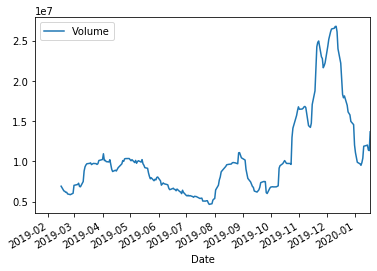

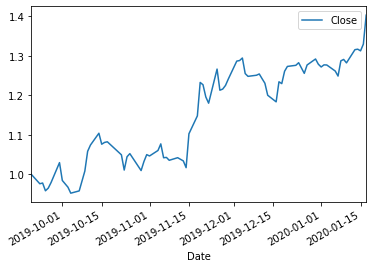

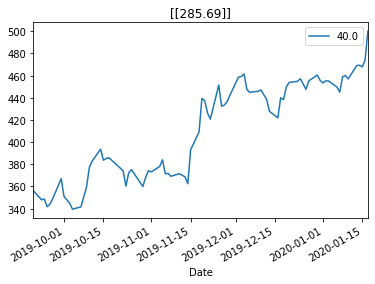

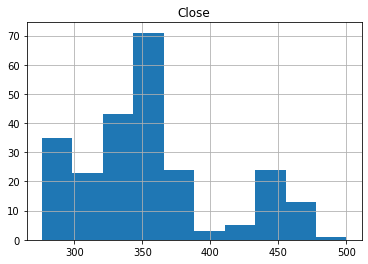

In [201]:
s = 'BHARTIARTL.NS'
d = 20*4
yahoo(s,d)

In [197]:
def yahoo(s,d):

    foo = yf.Ticker(s).history(period="1y")[['Volume']]
    bai = yf.Ticker(s).history(period="1y")[['Close']]
    fig = plt.figure(figsize = (8,5))
    foo.rolling(20).mean().plot()
    (bai.tail(d)/bai.tail(d).iloc[:1].values).plot()
#     plt.legend(foo.iloc[:1].values)
    # 1d, 5d, 1mo, 3mo, 6mo, 1y
    bai.tail(d).plot()
    plt.legend(100*((bai.iloc[-1]/bai.iloc[-d])-1).round(2))
    plt.title(bai.iloc[:1].values)
    print(bai.describe())
    print(100*((bai.tail(1).values/bai.head(1).values)-1).round(3),100*((bai.tail(1).values/bai.iloc[120:121].values)-1).round(3),100*((bai.tail(1).values/bai.iloc[180:181].values)-1).round(3))
    bai.hist(bins=10)
    

In [186]:
foo.tail(50).mean()/foo.mean()

Volume    1.034084
dtype: float64

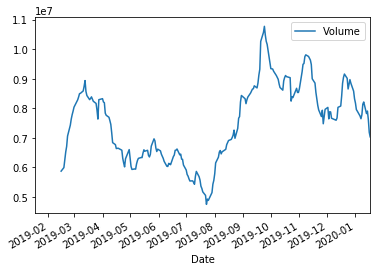

In [ ]:
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

In [83]:
for l in ls:
        print(l,100*(bc.loc[l,'CLOSE']/bc.loc[l,'PREVCLOSE']-1).round(2),
              100*(bc.loc[l,'CLOSE']/bcm.loc[l,'CLOSE']-1).round(2),
              100*(bc.loc[l,'CLOSE']/bcq.loc[l,'CLOSE']-1).round(2),
              100*(bc.loc[l,'CLOSE']/bcy.loc[l,'CLOSE']-1).round(2))

DCBBANK 4.0 18.0 1.0 12.0
DELTACORP 1.0 -8.0 12.0 -21.0
GRANULES 6.0 11.0 39.0 59.0
GSFC 3.0 27.0 8.0 -23.0
IBREALEST 3.0 66.0 59.0 20.0
INOXWIND 9.0 38.0 28.000000000000004 -34.0
JMFINANCIL 1.0 12.0 47.0 19.0
NAUKRI 2.0 -2.0 33.0 54.0
RADICO 2.0 17.0 10.0 -15.0


In [52]:
ls.remove('FORCEMOT')

In [45]:
bcy

,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13
SYMBOL,,,,,,,,,,,,,
20MICRONS,EQ,42.35,42.80,41.70,41.75,41.95,41.85,13524,569870.60,16-JAN-2019,216,INE144J01027,NaN
21STCENMGM,EQ,23.50,23.50,22.75,23.45,23.45,23.20,1972,45087.70,16-JAN-2019,13,INE253B01015,NaN
3IINFOTECH,EQ,3.50,3.65,3.50,3.60,3.65,3.55,1894897,6707615.25,16-JAN-2019,669,INE748C01020,NaN
3MINDIA,EQ,20850.95,20950.00,20635.65,20698.00,20700.00,20846.15,2060,42852710.60,16-JAN-2019,252,INE470A01017,NaN
3PLAND,EQ,11.85,12.00,10.95,11.05,11.05,11.85,2171,23971.05,16-JAN-2019,21,INE105C01023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZOTA,SM,258.50,260.10,258.00,258.55,258.55,261.00,10000,2586950.00,16-JAN-2019,20,INE358U01012,NaN
ZUARI,EQ,242.65,243.80,238.50,239.10,238.50,240.60,5605,1349066.50,16-JAN-2019,379,INE840M01016,NaN
ZUARIGLOB,EQ,125.60,125.60,122.65,122.95,122.65,124.65,9274,1142583.95,16-JAN-2019,157,INE217A01012,NaN


In [51]:
bcy.loc[bcy.index.str.startswith('MOT', na=False)]
bcy.loc[bcy.index.str.contains('MOT', na=False)]

,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13
SYMBOL,,,,,,,,,,,,,
EICHERMOT,EQ,20626.00,20783.95,20626.00,20735.70,20750.00,20638.15,67468,1.397801e+09,16-JAN-2019,19430,INE066A01013,NaN
HEROMOTOCO,EQ,2909.00,2914.95,2870.30,2879.85,2877.05,2910.95,261721,7.573398e+08,16-JAN-2019,26982,INE158A01026,NaN
HINDMOTORS,EQ,8.10,8.55,8.05,8.10,8.15,8.20,345112,2.852379e+06,16-JAN-2019,525,INE253A01025,NaN
MOTHERSUMI,EQ,160.65,164.30,160.20,162.30,162.30,160.70,2458362,3.997967e+08,16-JAN-2019,26030,INE775A01035,NaN
MOTILALOFS,EQ,680.00,692.40,680.00,682.45,684.80,678.80,39057,2.681052e+07,16-JAN-2019,2879,INE338I01027,NaN
MOTOGENFIN,EQ,48.25,49.50,48.25,49.50,49.50,50.00,4,1.967000e+02,16-JAN-2019,3,INE861B01015,NaN
SHARDAMOTR,EQ,1478.05,1517.75,1412.25,1453.50,1430.00,1442.10,1261,1.852216e+06,16-JAN-2019,298,INE597I01010,NaN
TATAMOTORS,EQ,186.00,187.35,184.05,185.45,185.60,185.35,11874245,2.204242e+09,16-JAN-2019,67725,INE155A01022,NaN
TVSMOTOR,EQ,545.00,550.00,544.00,548.90,548.30,544.00,535038,2.930791e+08,16-JAN-2019,8075,INE494B01023,NaN


In [12]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.336513,-2.494405,0.330590,-1.504122
1,0.801071,-1.471214,1.059376,-1.178843
2,2.052833,-0.849516,0.449943,-0.276567
3,-1.793581,0.250187,-1.113137,0.126320
4,1.267516,-0.758463,-0.602804,0.534299
5,-0.001555,0.745134,0.298342,0.449082
6,-0.279623,-0.252516,0.399127,0.185028
7,0.606201,0.498831,0.248945,1.450918
8,-1.133858,0.007306,1.154400,0.716245
9,-0.324430,0.255609,-0.018929,0.536375


In [136]:
np.random.randn(5, 2)

array([[ 0.99664749,  0.60125677],
       [-0.33321344, -0.74009904],
       [-0.06863476,  0.72814758],
       [-0.09258651,  1.52227524],
       [-0.06976154, -0.6732456 ]])